In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.regularizers import l2


In [4]:
train_dir = '/content/drive/MyDrive/Bangkitproject/tomato/train'
val_dir='/content/drive/MyDrive/Bangkitproject/tomato/val'

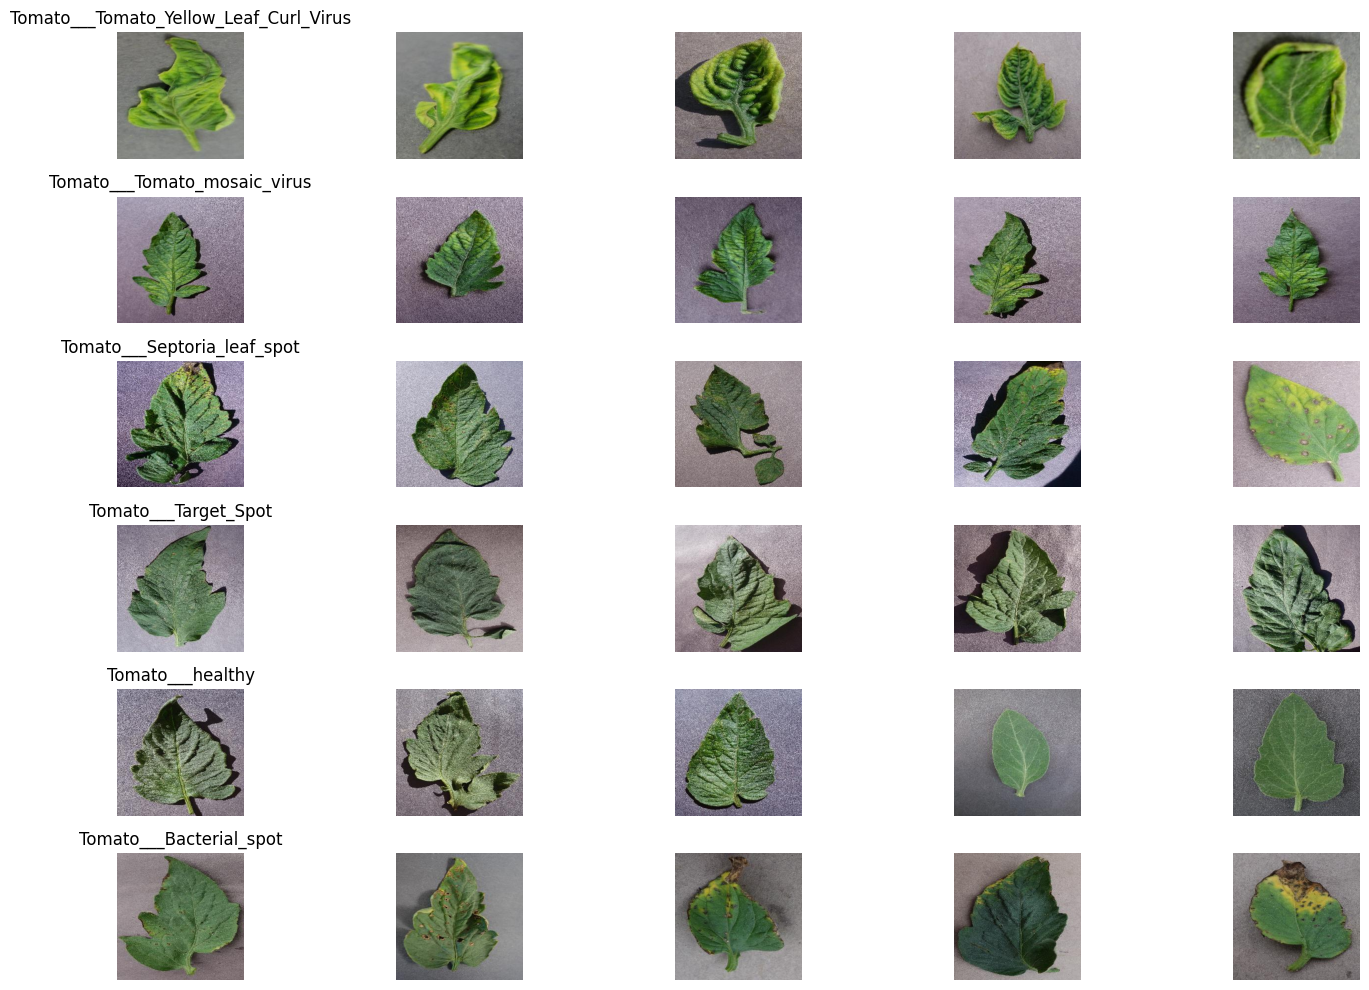

In [5]:
categories = os.listdir(train_dir)

plt.figure(figsize=(15, 10))
num_categories = len(categories)

for i, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    image_files = os.listdir(category_path)[:5]

    for j, file in enumerate(image_files):
        img_path = os.path.join(category_path, file)
        img = load_img(img_path)
        plt.subplot(num_categories, 5, i * 5 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        if j == 0:
            plt.title(category)

plt.tight_layout()
plt.show()

In [6]:
# Menyiapkan data generator untuk augmentasi dan pra-pemrosesan data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Skalasi nilai pixel ke rentang [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Mendefinisikan generator untuk data train dan data validasi
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Ganti dengan path direktori data train
        target_size=(150, 150),  # Ukuran gambar yang diharapkan
        batch_size=32,
        class_mode='categorical')  # Mode kelas untuk klasifikasi multiclass

validation_generator = val_datagen.flow_from_directory(
        val_dir,  # Ganti dengan path direktori data validasi
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# Membangun arsitektur model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Jumlah kelas output
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Found 5335 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,062 (4.05 MB)

 Trainable params: 1,061,062 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Melatih model
history=model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

# Simpan model
model.save('tomato_disease_classifier.h5')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


167/167 ━━━━━━━━━━━━━━━━━━━━ 3395s 20s/step - accuracy: 0.2285 - loss: 1.9362 - val_accuracy: 0.4508 - val_loss: 1.3099
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 314ms/step - accuracy: 0.4361 - loss: 1.4089 - val_accuracy: 0.5295 - val_loss: 1.2953
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 307ms/step - accuracy: 0.5464 - loss: 1.1583 - val_accuracy: 0.6339 - val_loss: 0.8256
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 308ms/step - accuracy: 0.6590 - loss: 0.9625 - val_accuracy: 0.6083 - val_loss: 1.1923
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.7180 - loss: 0.8379 - val_accuracy: 0.8091 - val_loss: 0.6328
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 56s 322ms/step - accuracy: 0.7933 - loss: 0.6670 - val_accuracy: 0.7677 - val_loss: 0.7089
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 307ms/step - accuracy: 0.8120 - loss: 0.6017 - val_accuracy: 0.7323 - val_loss: 0.9359
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 83s 315ms/step - accuracy: 0.8315 - loss: 0.563

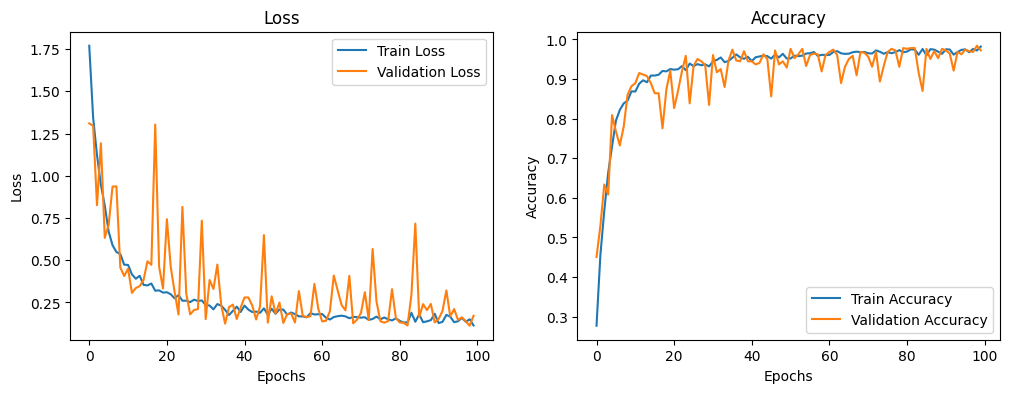

In [9]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Found 508 images belonging to 6 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


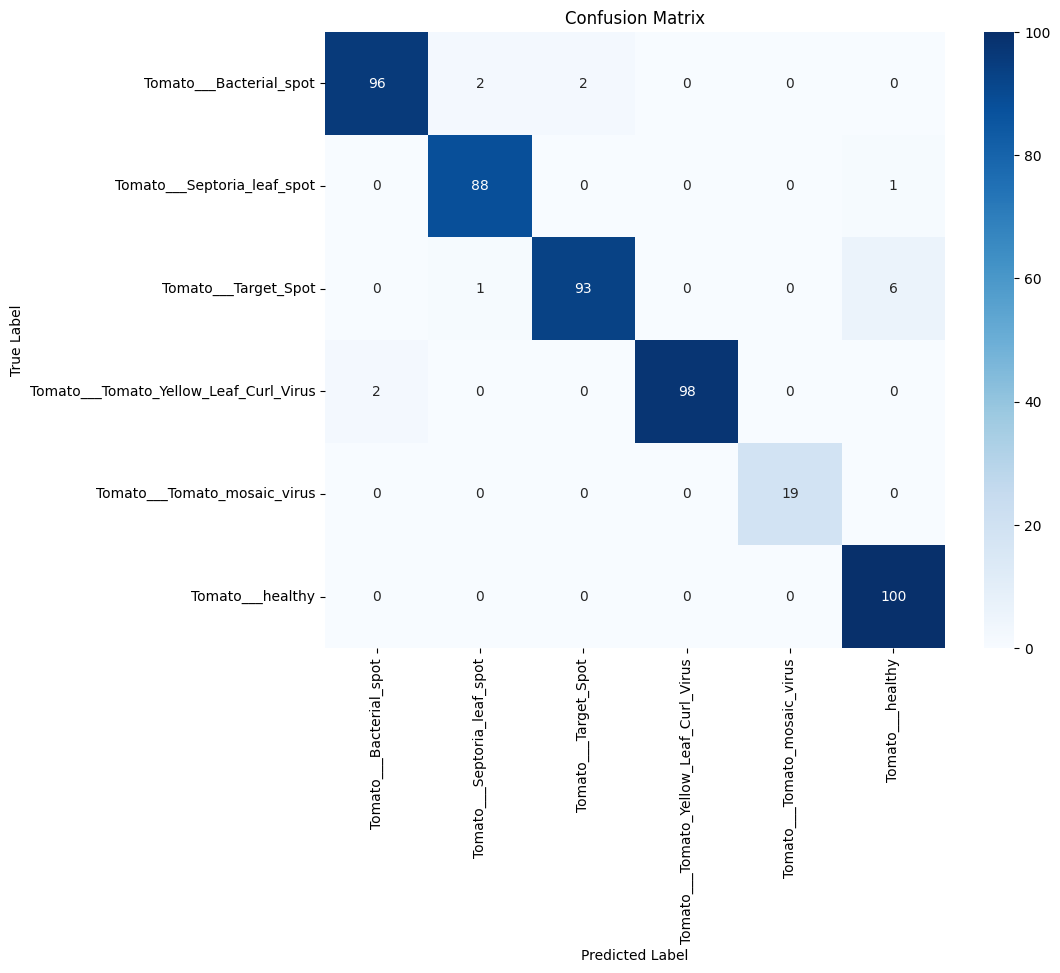

Classification Report:
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.98      0.96      0.97       100
           Tomato___Septoria_leaf_spot       0.97      0.99      0.98        89
                  Tomato___Target_Spot       0.98      0.93      0.95       100
Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.98      0.99       100
          Tomato___Tomato_mosaic_virus       1.00      1.00      1.00        19
                      Tomato___healthy       0.93      1.00      0.97       100

                              accuracy                           0.97       508
                             macro avg       0.98      0.98      0.98       508
                          weighted avg       0.97      0.97      0.97       508



In [10]:
# Load model yang sudah dilatih
model = tf.keras.models.load_model('tomato_disease_classifier.h5')

# Mendefinisikan ulang generator untuk data validasi tanpa augmentasi
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
        val_dir,  # Ganti dengan path direktori data validasi
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Mendapatkan prediksi dari model
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mendapatkan label sebenarnya
y_true = validation_generator.classes

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
print('Classification Report:')
print(class_report)

In [11]:
# Path ke gambar yang ingin diuji
img_path = '/content/drive/MyDrive/Bangkitproject/bacterial_spot_tomato.jpg'  # Ganti dengan path gambar yang ingin diuji

# Memuat gambar dan menyesuaikan ukurannya
img = image.load_img(img_path, target_size=(150, 150))

# Mengubah gambar menjadi larik numpy
img_array = image.img_to_array(img)

# Menambahkan dimensi batch (karena model memerlukan input batch)
img_array = np.expand_dims(img_array, axis=0)

# Melakukan prediksi
predictions = model.predict(img_array)

# Mendapatkan indeks kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions)

# Mendapatkan nama folder dari path dataset untuk membuat daftar label
dataset_path = '/content/drive/MyDrive/Bangkitproject/tomato/val'  # Ganti dengan path ke folder train yang berisi folder kelas
label_names = sorted(os.listdir(dataset_path))
print(label_names)

# Mendapatkan label kelas berdasarkan indeks prediksi
predicted_label = label_names[predicted_class]

print("Predicted class:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
['Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Predicted class: Tomato___Septoria_leaf_spot
